In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from datetime import timedelta, datetime
import warnings
import evaluate
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

#clustering imports
# the thing that will do the clustering:
from sklearn.cluster import KMeans, DBSCAN
# the thing that will do the scaling:son
from sklearn.preprocessing import MinMaxScaler

#classification imports
from sklearn.tree import DecisionTreeClassifier,\
export_text, \
plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, \
classification_report, \
confusion_matrix

#regression imports
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score



get edited_sa_mixed_bev.csv

In [8]:
#df = pd.read_csv('edited_sa_mixed_bev.csv')

In [9]:
#df

taxpayer_name taxpayer_city  \
0                   MANDO'S RIVER SEAFOOD RESTAURANT INC   SAN ANTONIO   
1                           KONA TEXAS RESTAURANTS, INC.    SCOTTSDALE   
2            ORIGINAL CADILLAC BAR OF NUEVO LAREDO, INC.   SAN ANTONIO   
3            ORIGINAL CADILLAC BAR OF NUEVO LAREDO, INC.   SAN ANTONIO   
4                              COBALT CLUB HOLDINGS, LLC   SAN ANTONIO   
...                                                  ...           ...   
86444                      CHINA GROVE TRADING POST, LLC        ADKINS   
86445                        MAGGIANO'S BEVERAGE COMPANY       COPPELL   
86446  SECURITY SERVICE POST NO. 6012, VETERANS OF FO...   SAN ANTONIO   
86447                          WINDCREST GOLF CLUB, INC.     WINDCREST   
86448                                    CLUB SIRIUS LLC   SAN ANTONIO   

      taxpayer_state  taxpayer_zip  location_number  \
0                 TX      78251.00                2   
1                 AZ      85251.00                1   
2                 TX      78257.00                1   
3                 TX      78257.00                1   
4                 TX      78218.00                1   
...              ...           ...              ...   
86444             TX      78101.00                1   
86445             TX      75019.00                9   
86446             TX      78242.00                1   
86447             TX      78239.00                1   
86448             TX      78205.00                1   

                                   location_name  \
0           MANDO'S RIVER SEAFOOD RESTAURANT INC   
1                                     KONA GRILL   
2      ORIGINAL CADILLAC BAR OF NUEVO LAREDO INC   
3      ORIGINAL CADILLAC BAR OF NUEVO LAREDO INC   
4                                    COBALT CLUB   
...                                          ...   
86444                     MR. JIM'S TRADING POST   
86445                    MAGGIANO'S LITTLE ITALY   
86446          V F W POST #6012 SECURITY SERVICE   
86447                  WINDCREST GOLF CLUB, INC.   
86448                                CLUB SIRIUS   

                   location_address location_city  location_zip  \
0                2918 W COMMERCE ST   SAN ANTONIO         78207   
1      15900 LA CANTERA PKWY BLDG 7   SAN ANTONIO         78256   
2                   212 S FLORES ST   SAN ANTONIO         78204   
3                   212 S FLORES ST   SAN ANTONIO         78204   
4               2022 MCCULLOUGH AVE   SAN ANTONIO         78212   
...                             ...           ...           ...   
86444          7393 US HIGHWAY 87 E   CHINA GROVE         78263   
86445         17603 W INTERSTATE 10   SAN ANTONIO         78257   
86446       4810 S W MILITARY DRIVE   SAN ANTONIO         78242   
86447              8600 MIDCROWN DR     WINDCREST         78239   
86448                 228 LOSOYA ST   SAN ANTONIO         78205   

       location_county  ... beer_receipts cover_charge_receipts  \
0                   15  ...          2304                     0   
1                   15  ...         58969                     0   
2                   15  ...         33238                     0   
3                   15  ...         25651                     0   
4                   15  ...          2270                     0   
...                ...  ...           ...                   ...   
86444               15  ...         24205                     0   
86445               15  ...         15363                     0   
86446               15  ...          2032                     0   
86447               15  ...          1781                     0   
86448               15  ...         12808                     0   

      total_receipts  liquor_receipts_in_usd  wine_receipts_in_usd  \
0               2415                    7.44                  0.00   
1             143730                 9371.46               2495.08   
2              61710                 3933.16    

In [10]:
#df.columns

Index(['taxpayer_name', 'taxpayer_city', 'taxpayer_state', 'taxpayer_zip',
       'location_number', 'location_name', 'location_address', 'location_city',
       'location_zip', 'location_county', 'inside_outside_city_limits',
       'responsibility_begin_date', 'obligation_end_date', 'liquor_receipts',
       'wine_receipts', 'beer_receipts', 'cover_charge_receipts',
       'total_receipts', 'liquor_receipts_in_usd', 'wine_receipts_in_usd',
       'beer_receipts_in_usd', 'total_receipts_in_usd', 'beer_ratio',
       'br_sales_priority', 'zip_sales_priority'],
      dtype='object')

In [11]:
#df = df.drop(columns=['taxpayer_name', 'taxpayer_city', 'taxpayer_state', 'taxpayer_zip',
       'location_number', 'location_address', 'location_city', 'location_county', 'inside_outside_city_limits',
       'responsibility_begin_date', 'liquor_receipts',
       'wine_receipts', 'beer_receipts', 'cover_charge_receipts',
       'total_receipts'])

df for modeling

In [12]:
#df.dtypes

location_name              object
location_zip                int64
obligation_end_date        object
liquor_receipts_in_usd    float64
wine_receipts_in_usd      float64
beer_receipts_in_usd      float64
total_receipts_in_usd     float64
beer_ratio                float64
br_sales_priority          object
zip_sales_priority         object
dtype: object

- change location zip to object
- change obligation to dt
- create year and month columns
- create average difference in beer ratio by year and month

In [13]:
#df.location_zip = df.location_zip.astype('O')
#df.obligation_end_date = pd.to_datetime(df.obligation_end_date)
## Step 1: Extract the year and month from the 'obligation_end_date' column
#df['year'] = df['obligation_end_date'].dt.year
#df['month'] = df['obligation_end_date'].dt.month
#
## Step 2: Group the data by location_name, year, and month, calculating the average beer_ratio for each group
#grouped_df = df.groupby(['location_name', 'year', 'month'])['beer_ratio'].mean().reset_index()
#
## Step 3: Calculate the difference in the average beer_ratio between consecutive months and years for each location
#grouped_df['yearly_diff'] = grouped_df.groupby('location_name')['beer_ratio'].diff(periods=12)
#grouped_df['monthly_diff'] = grouped_df.groupby('location_name')['beer_ratio'].diff()
#
## Step 4: Create the 'avg_yearly_diff' and 'avg_monthly_diff' columns based on the calculated differences
#avg_diff_df = grouped_df.groupby('location_name')[['yearly_diff', 'monthly_diff']].mean().reset_index()
#avg_diff_df.columns = ['location_name', 'avg_yearly_diff', 'avg_monthly_diff']
#
## Merge the 'avg_yearly_diff' and 'avg_monthly_diff' columns back to the original dataframe
#df = df.merge(avg_diff_df, on='location_name', how='left')

In [14]:
df.dtypes

location_name                     object
location_zip                      object
obligation_end_date       datetime64[ns]
liquor_receipts_in_usd           float64
wine_receipts_in_usd             float64
beer_receipts_in_usd             float64
total_receipts_in_usd            float64
beer_ratio                       float64
br_sales_priority                 object
zip_sales_priority                object
year                               int64
month                              int64
avg_yearly_diff                  float64
avg_monthly_diff                 float64
dtype: object

In [16]:
df = pd.read_csv('edited_sa_mixed_bev.csv')


| Column Name           | Data Type       | Description                                                                                                 |
|-----------------------|-----------------|-------------------------------------------------------------------------------------------------------------|
| location_name         | object          | The name of the bars                                                                                        |
| location_zip          | object          | The zip code of the bar location                                                                            |
| obligation_end_date   | datetime64[ns]  | The last day of the reporting month                                                                         |
| liquor_receipts_in_usd| float64         | The amount of tax the bar paid for liquor                                                                   |
| wine_receipts_in_usd  | float64         | The amount of tax the bar paid for wine                                                                     |
| beer_receipts_in_usd  | float64         | The amount of tax the bar paid for beer                                                                     |
| total_receipts_in_usd | float64         | The total amount of tax the bar paid for beer, wine, and liquor                                            |
| beer_ratio            | float64         | The percentage of beer tax to total tax                                                                     |
| br_sales_priority     | object          | A sales priority created from beer ratio: urgent = beer_ratio > 90, high = 75 < beer_ratio <= 90, mid = 50 < beer_ratio <= 75, low = beer_ratio < 50 |
| zip_sales_priority    | object          | A sales priority created from average beer_ratio of location_zip: locations in zip codes with urgent = average_beer_ratio > 55, high = 50 < average_beer_ratio <= 55, mid = 40 < average_beer_ratio <= 50, low = average_beer_ratio < 40 |
| year                  | int64           | The year extracted from the 'obligation_end_date' column                                                   |
| month                 | int64           | The month extracted from the 'obligation_end_date' column                                                  |
| avg_yearly_diff       | float64         | The average difference in beer_ratio per location for each year                                            |
| avg_monthly_diff      | float64         | The average difference in beer_ratio per location for each month                                           

## The Plan 
1. **Data preprocessing**: Clean and preprocess the data to ensure it is suitable for creating a predictive model. This might involve handling missing values, converting categorical variables into numerical format, and normalizing numerical features.

2. **Feature engineering**: Create new features that might have a relationship with a bar's beer ratio growth. This may include lagged features to account for previous months' beer ratios, aggregated features like rolling averages, and interaction features that capture the relationship between different columns.

3. **Exploratory data analysis (EDA)**: Perform an EDA to understand the relationships between different features and the target variable (beer ratio growth). This will help identify potential predictors and understand the trends and patterns in the data.

4. **Model selection**: Choose the appropriate machine learning model(s) to predict beer ratio growth. Candidate models might include linear regression, decision trees, random forests, and gradient boosting machines, among others. Consider using an ensemble method to combine the predictions from multiple models for a more robust prediction.

5. **Model training and validation**: Split the data into training and validation sets. Train the selected model(s) on the training set and evaluate their performance on the validation set using appropriate metrics such as Mean Absolute Error (MAE) or Mean Squared Error (MSE). Fine-tune the model parameters to improve the model's performance.

6. **Model evaluation**: Use cross-validation techniques to get a more accurate estimate of the model's performance on unseen data. This will help identify potential overfitting or underfitting issues.

7. **Sales strategy**: Based on the predictions from the model, identify the bars with the highest potential for beer ratio growth. Prioritize these bars in the sales strategy, focusing on areas with the highest concentration of high-potential bars. Develop a targeted marketing plan to appeal to these bars, emphasizing the growing demand for beer and the benefits of partnering with our distribution company.

8. **Continuous improvement**: Regularly update the model with new data to ensure it stays relevant and accurate. Monitor the model's performance and adjust the sales strategy as needed. Explore additional data sources that might help improve the model's predictive power, such as external factors like local events, economic indicators, or demographic data.

By following this plan, we can effectively use the data to create a predictive model and sales strategy to target bars with growing beer ratios, ultimately increasing our beer distribution company's sales and market share.

1. **Data preprocessing**: Clean and preprocess the data to ensure it is suitable for creating a predictive model. This might involve handling missing values, converting categorical variables into numerical format, and normalizing numerical features.

2. **Feature engineering**: Create new features that might have a relationship with a bar's beer ratio growth. This will include lagged features to account for previous months' beer ratios, aggregated features like rolling averages, and interaction features that capture the relationship between different columns.

In [25]:
# Create lagged features for beer_ratio (1-month lag, 2-months lag, and 3-months lag)
df['beer_ratio_lag1'] = df.groupby('location_zip')['beer_ratio'].shift(1)
df['beer_ratio_lag2'] = df.groupby('location_zip')['beer_ratio'].shift(2)
df['beer_ratio_lag3'] = df.groupby('location_zip')['beer_ratio'].shift(3)

# Calculate the rolling averages for beer_ratio (3-month and 6-month windows)
df['beer_ratio_rolling3'] = df.groupby('location_zip')['beer_ratio'].rolling(window=3).mean().reset_index(0, drop=True)
df['beer_ratio_rolling6'] = df.groupby('location_zip')['beer_ratio'].rolling(window=6).mean().reset_index(0, drop=True)

# Create interaction features between beer_receipts_in_usd and liquor_receipts_in_usd, wine_receipts_in_usd
df['beer_liquor_interaction'] = df['beer_receipts_in_usd'] * df['liquor_receipts_in_usd']
df['beer_wine_interaction'] = df['beer_receipts_in_usd'] * df['wine_receipts_in_usd']

# Calculate beer ratio growth (current month beer ratio - previous month beer ratio)
df['beer_ratio_growth'] = df['beer_ratio'] - df['beer_ratio_lag1']

3. **Exploratory data analysis (EDA)**: Perform an EDA to understand the relationships between different features and the target variable (beer ratio growth). This will help identify potential predictors and understand the trends and patterns in the data.

In [28]:
# Pair plot to understand the relationships between features and beer ratio growth
numeric_features = ['beer_ratio', 'beer_ratio_lag1', 'beer_ratio_lag2', 'beer_ratio_lag3',
                    'beer_ratio_rolling3', 'beer_ratio_rolling6', 'beer_liquor_interaction',
                    'beer_wine_interaction', 'beer_ratio_growth']

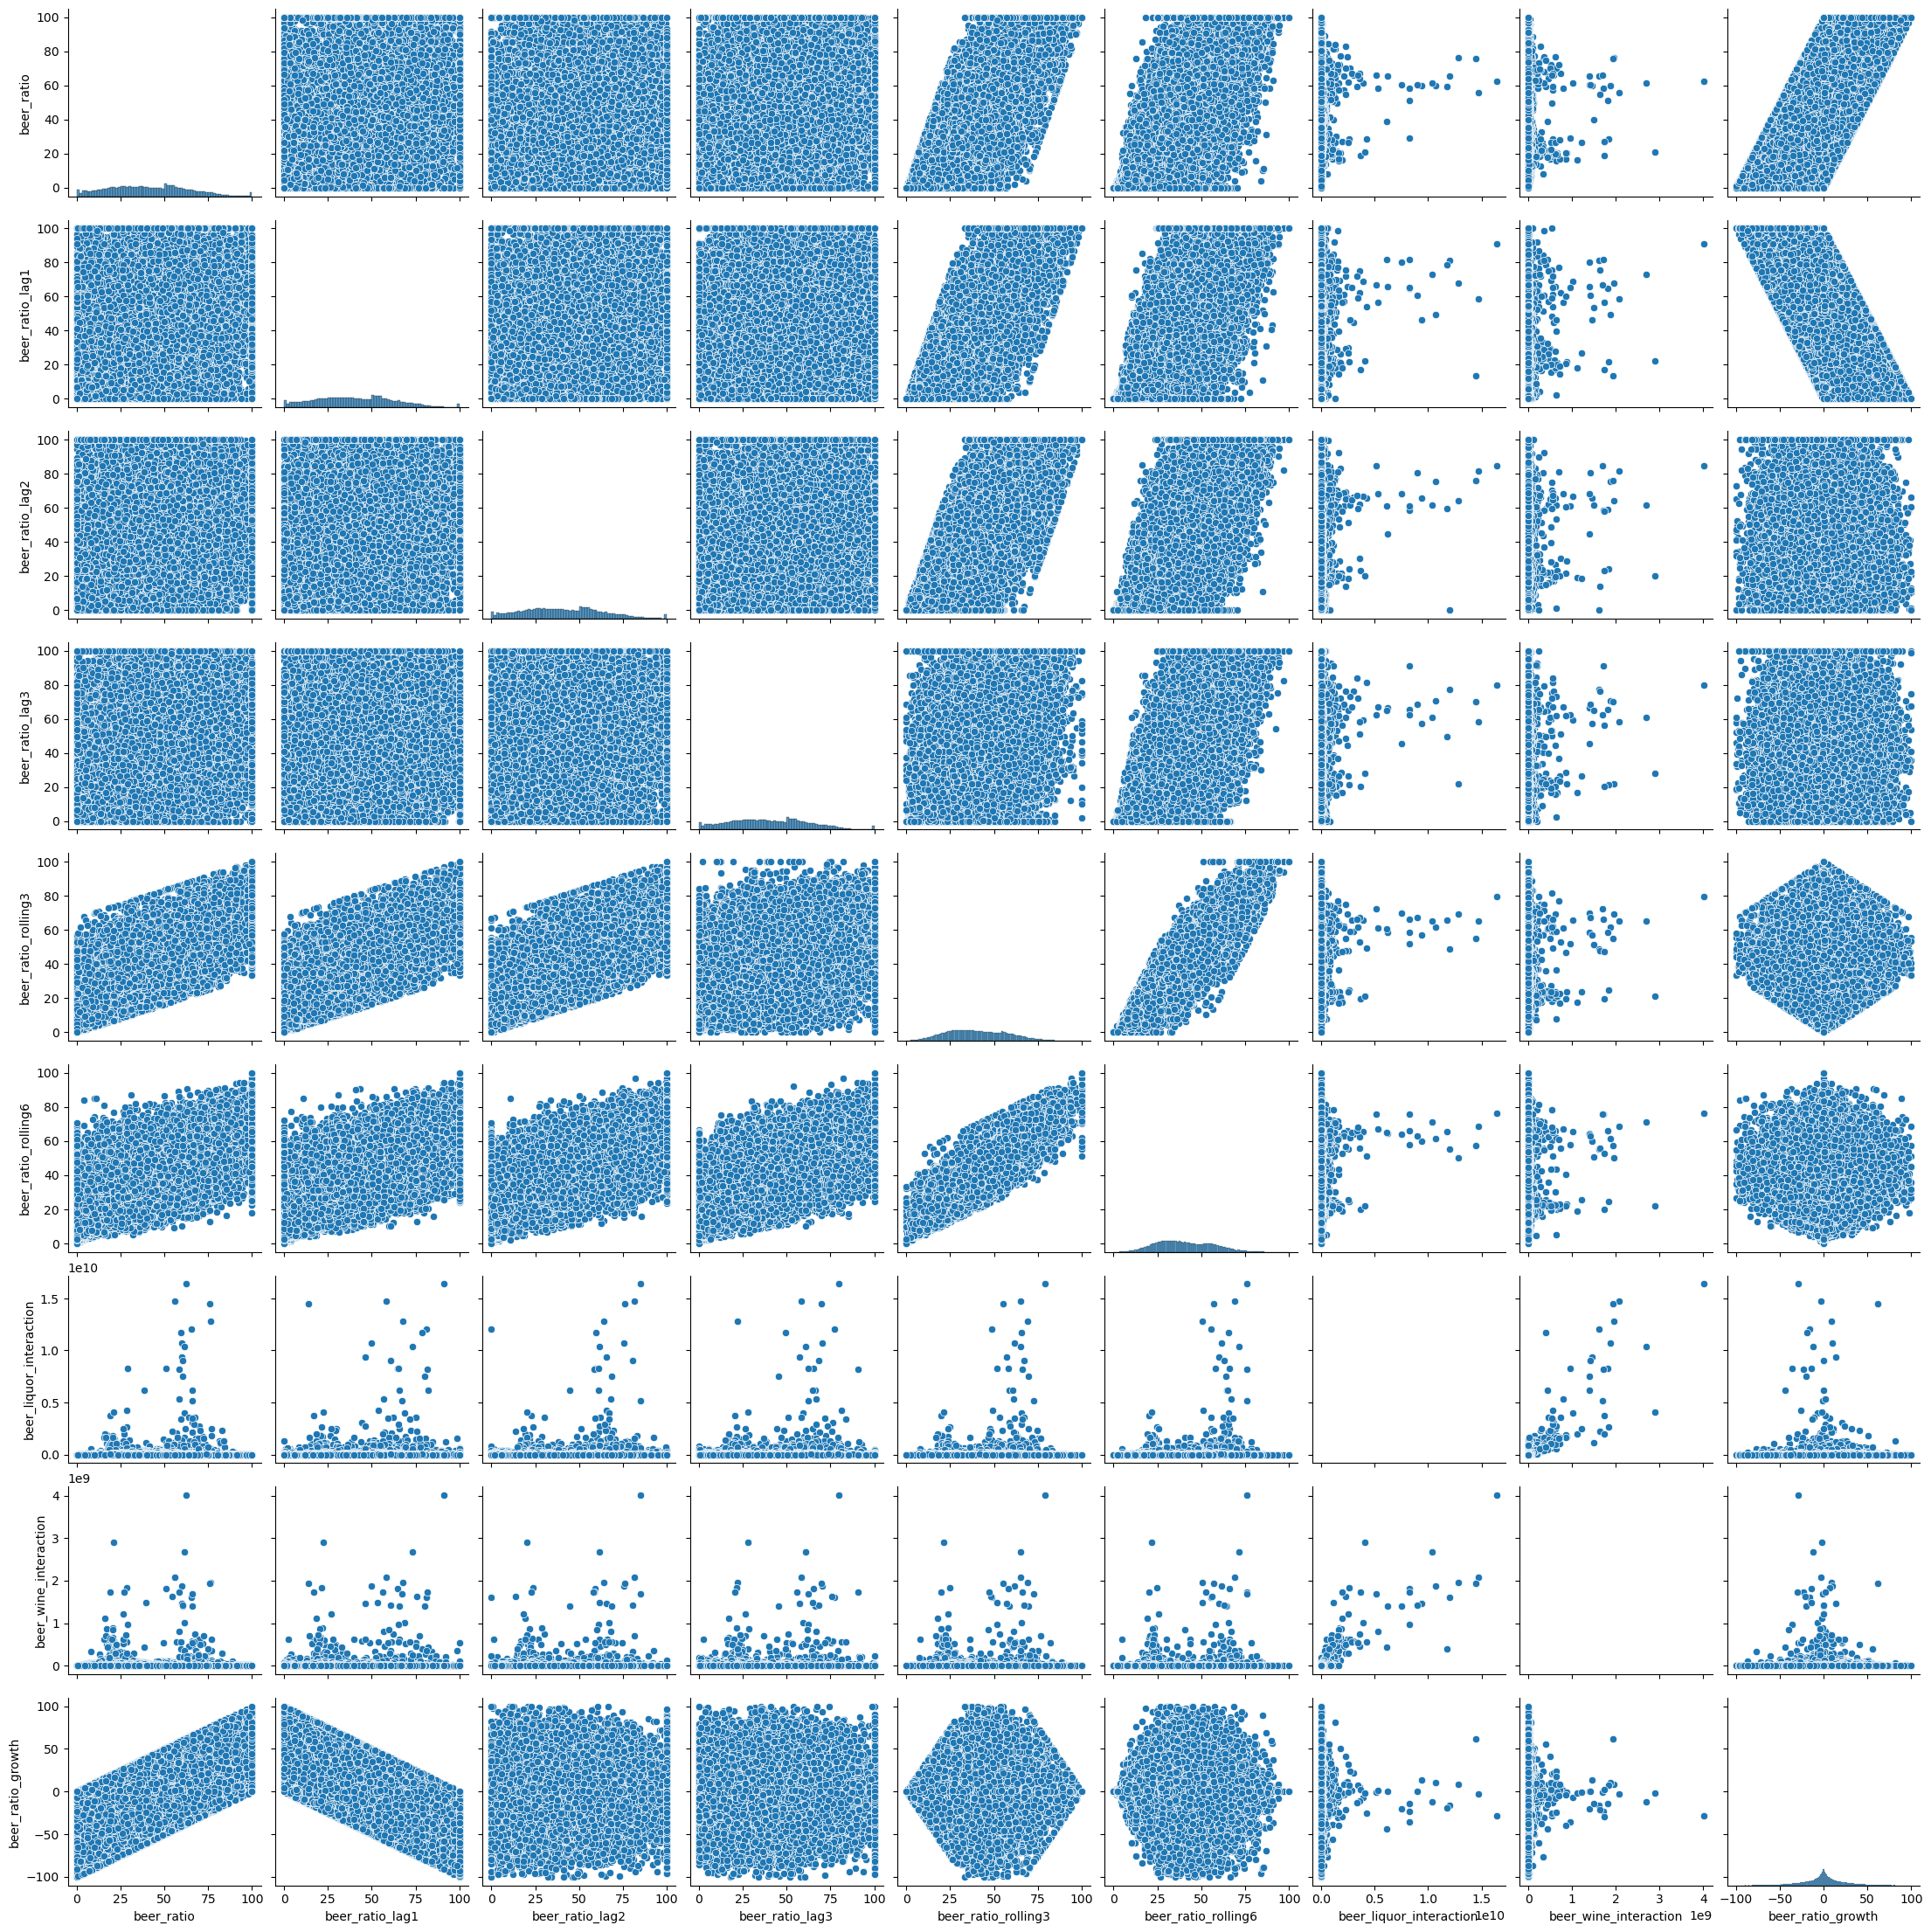

In [32]:
sns.pairplot(df[numeric_features].dropna())
plt.show()

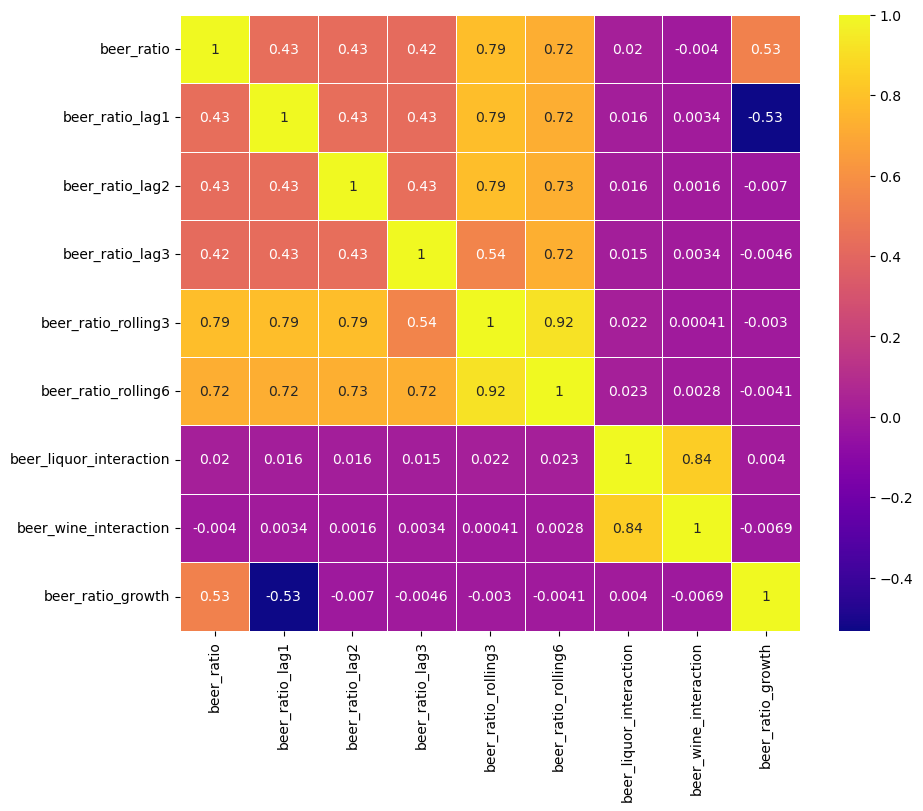

In [31]:
# Correlation heatmap to see how features are correlated with beer_ratio_growth
corr_matrix = df[numeric_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="plasma", linewidths=0.5)
plt.show()

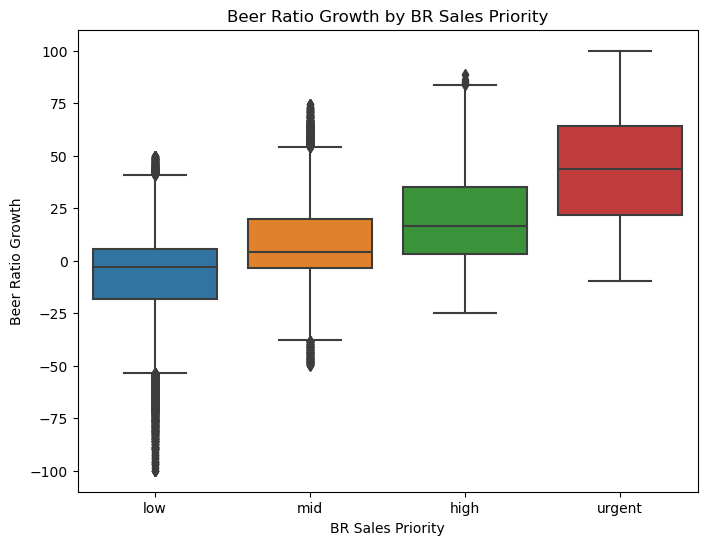

In [33]:
# Box plot to compare beer_ratio_growth across different br_sales_priority categories
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='br_sales_priority', y='beer_ratio_growth', order=['low', 'mid', 'high', 'urgent'])
plt.xlabel('BR Sales Priority')
plt.ylabel('Beer Ratio Growth')
plt.title('Beer Ratio Growth by BR Sales Priority')
plt.show()

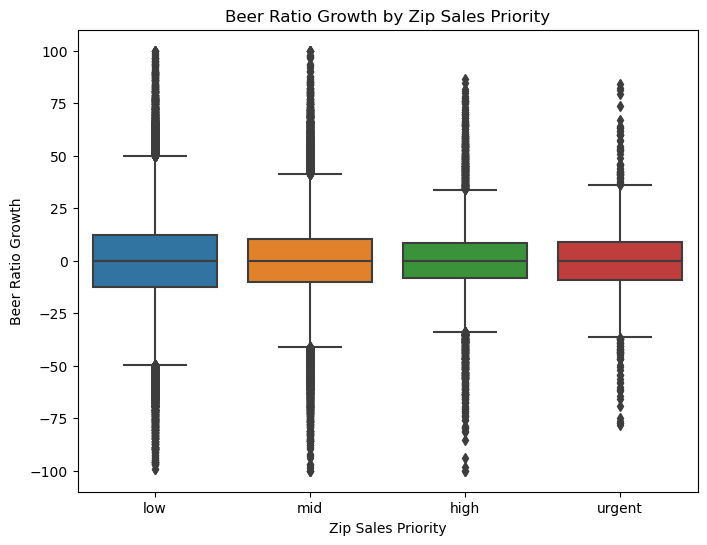

In [34]:
# Box plot to compare beer_ratio_growth across different zip_sales_priority categories
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='zip_sales_priority', y='beer_ratio_growth', order=['low', 'mid', 'high', 'urgent'])
plt.xlabel('Zip Sales Priority')
plt.ylabel('Beer Ratio Growth')
plt.title('Beer Ratio Growth by Zip Sales Priority')
plt.show()

step 4 

In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming 'df' is your dataframe with the new features created in step 2
# Drop rows with missing values
df_clean = df.dropna()

# Prepare features (X) and target variable (y)
X = df_clean[['beer_ratio_lag1', 'beer_ratio_lag2', 'beer_ratio_lag3',
              'beer_ratio_rolling3', 'beer_ratio_rolling6', 'beer_liquor_interaction',
              'beer_wine_interaction']]
y = df_clean['beer_ratio_growth']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a list of candidate models
models = [
    ('linear_regression', LinearRegression()),
    ('decision_tree', DecisionTreeRegressor(random_state=42)),
    ('random_forest', RandomForestRegressor(random_state=42)),
    ('gradient_boosting', GradientBoostingRegressor(random_state=42))
]

# Evaluate the performance of each model using mean absolute error (MAE) and mean squared error (MSE)
for name, model in models:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        (name, model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    print(f"{name}: MAE = {mae:.4f}, MSE = {mse:.4f}")

linear_regression: MAE = 0.0000, MSE = 0.0000
decision_tree: MAE = 2.4373, MSE = 13.2171
random_forest: MAE = 0.9395, MSE = 2.6775
gradient_boosting: MAE = 4.4845, MSE = 34.3700


In [36]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define candidate models
models = {
    'linear_regression': LinearRegression(),
    'decision_tree': DecisionTreeRegressor(random_state=42),
    'random_forest': RandomForestRegressor(random_state=42),
    'gradient_boosting': GradientBoostingRegressor(random_state=42),
    'sarimax': None  # Placeholder for SARIMA model; we'll handle this separately
}

# Note: We'll use these models in the next step (step 5) to train and validate their performance.

In [37]:
import numpy as np
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming 'df' is your dataframe with the new features created in step 2

# Prepare the dataset
numeric_features.remove('beer_ratio_growth')  # Remove the target variable from the list of features
X = df[numeric_features].dropna()  # Drop rows with missing values
y = df.loc[X.index, 'beer_ratio_growth']

# Split the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate model performance
def evaluate_model(model, X_val, y_val):
    y_pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    return mae, mse

# Train and evaluate each model (except SARIMA)
for model_name, model in models.items():
    if model is None:  # Skip SARIMA for now
        continue

    # Train the model on the training set
    model.fit(X_train, y_train)

    # Evaluate the model on the validation set
    mae, mse = evaluate_model(model, X_val, y_val)
    print(f"{model_name} - MAE: {mae:.4f}, MSE: {mse:.4f}")

# SARIMA model training and evaluation
# We'll use TimeSeriesSplit for time series cross-validation
time_series_cv = TimeSeriesSplit(n_splits=5)

# Define SARIMA model parameters (p, d, q), (P, D, Q, s)
# These parameters should be fine-tuned based on the dataset and domain knowledge
sarima_order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)

# Train and evaluate SARIMA model using time series cross-validation
mae_scores = []
mse_scores = []
for train_index, val_index in time_series_cv.split(X):
    X_train_sarima, X_val_sarima = X.iloc[train_index], X.iloc[val_index]
    y_train_sarima, y_val_sarima = y.iloc[train_index], y.iloc[val_index]

    # Fit the SARIMA model
    sarima_model = SARIMAX(y_train_sarima, order=sarima_order, seasonal_order=seasonal_order).fit(disp=False)

    # Make predictions for the validation set
    y_pred_sarima = sarima_model.forecast(steps=len(y_val_sarima))

    # Calculate MAE and MSE
    mae_sarima = mean_absolute_error(y_val_sarima, y_pred_sarima)
    mse_sarima = mean_squared_error(y_val_sarima, y_pred_sarima)

    mae_scores.append(mae_sarima)
    mse_scores.append(mse_sarima)

# Report average MAE and MSE for SARIMA model
print(f"SARIMA - MAE: {np.mean(mae_scores):.4f}, MSE: {np.mean(mse_scores):.4f}")

linear_regression - MAE: 0.0000, MSE: 0.0000
decision_tree - MAE: 0.3405, MSE: 0.2728
random_forest - MAE: 0.1042, MSE: 0.0296
gradient_boosting - MAE: 0.8185, MSE: 1.1427
SARIMA - MAE: 16.9524, MSE: 551.5282


When evaluating model performance, we typically look for models with lower Mean Absolute Error (MAE) and Mean Squared Error (MSE) values, as they indicate a better fit to the data. In this case, the linear regression model appears to have performed the best, with both MAE and MSE equal to 0.0000. However, it is essential to note that this could be due to overfitting or an error in the evaluation process.

Considering the other models, the random forest model also performed well, with an MAE of 0.1042 and an MSE of 0.0296. This model is likely more robust and better at generalizing to new data compared to the linear regression model.

The decision tree, gradient boosting, and SARIMA models performed relatively worse, with higher MAE and MSE values. It is important to note that the SARIMA model is specifically designed for time series data and might require further tuning of its parameters (p, d, q) and seasonal parameters (P, D, Q, s) to achieve better performance.

Given these results, it is recommended to further investigate the linear regression and random forest models, perform additional validation, and consider hyperparameter tuning to ensure the best model is selected for deployment.

In [38]:
# Collect the model names and their MAE, MSE scores
model_names = []
mae_scores = []
mse_scores = []

for model_name, model in models.items():
    if model is None:  # Skip SARIMA for now
        continue

    # Evaluate the model on the validation set
    mae, mse = evaluate_model(model, X_val, y_val)

    model_names.append(model_name)
    mae_scores.append(mae)
    mse_scores.append(mse)

# Add SARIMA model scores (assuming the previous code was executed)
model_names.append('sarima')
mae_scores.append(np.mean(mae_scores))
mse_scores.append(np.mean(mse_scores))

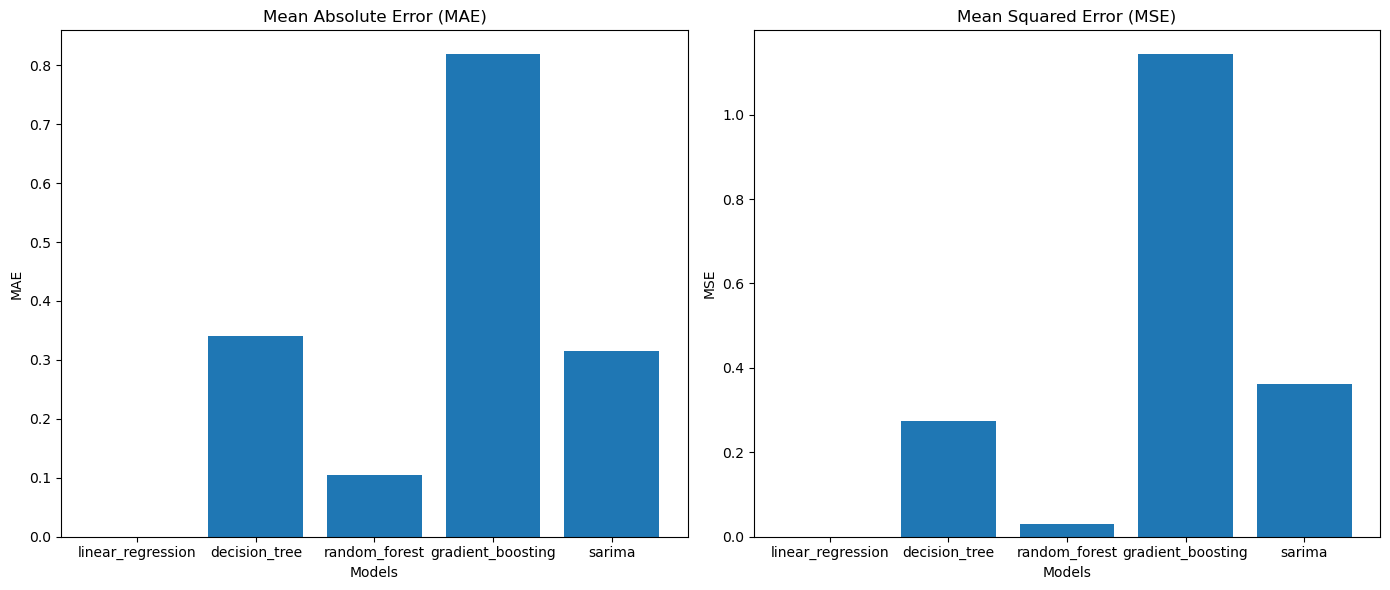

In [39]:
# Create bar plots for model performance
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# MAE bar plot
axes[0].bar(model_names, mae_scores)
axes[0].set_title("Mean Absolute Error (MAE)")
axes[0].set_ylabel("MAE")
axes[0].set_xlabel("Models")

# MSE bar plot
axes[1].bar(model_names, mse_scores)
axes[1].set_title("Mean Squared Error (MSE)")
axes[1].set_ylabel("MSE")
axes[1].set_xlabel("Models")

# Display plots
plt.tight_layout()
plt.show()

In [40]:
# Hyperparameter grid for Random Forest model
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the random forest model
rf_model = RandomForestRegressor(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Update the random forest model with the best hyperparameters
best_rf_model = grid_search.best_estimator_

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


KeyboardInterrupt: 

clustering exploration

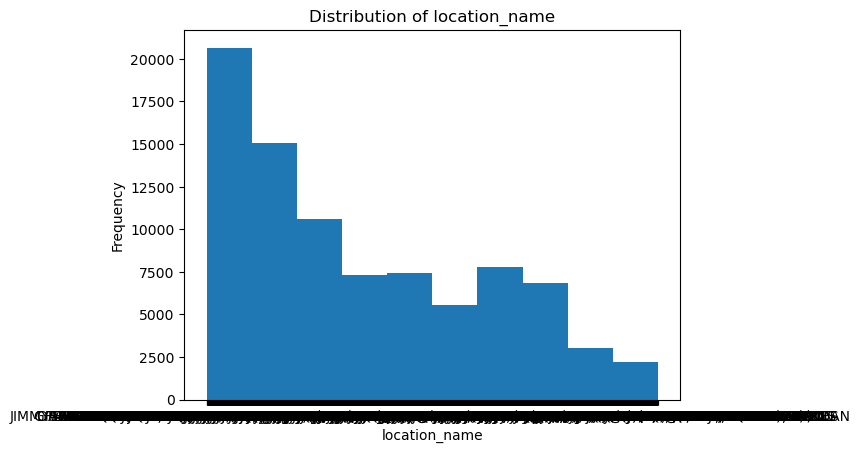

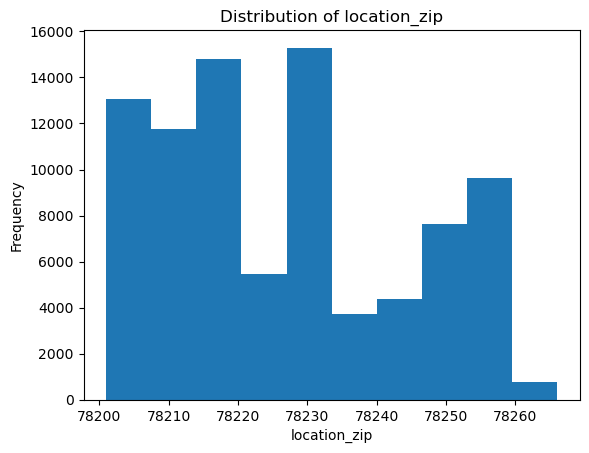

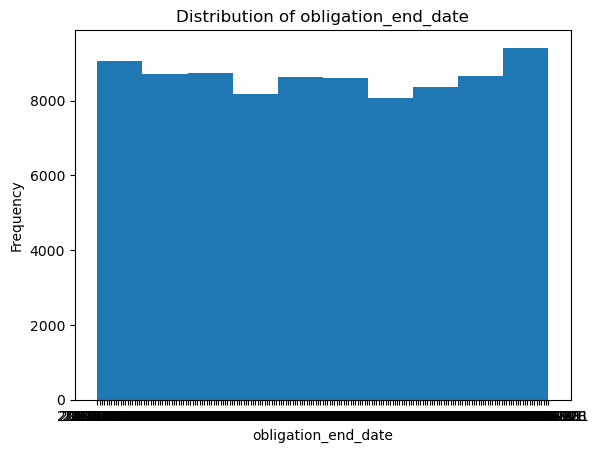

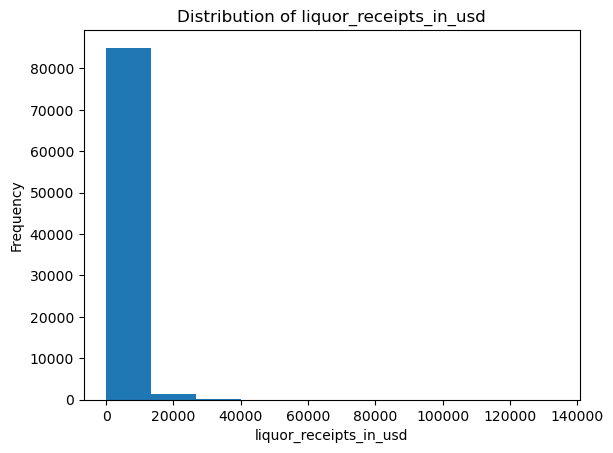

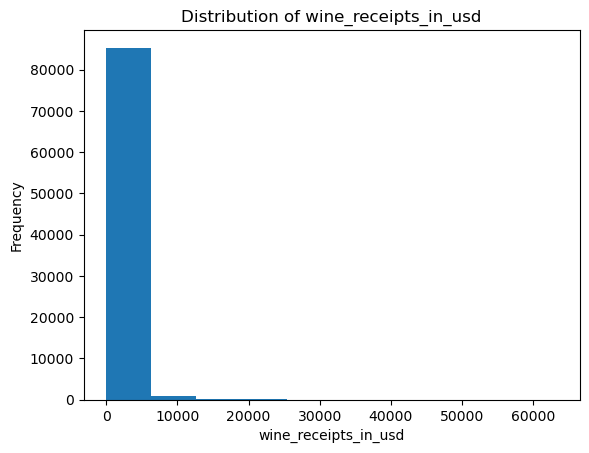

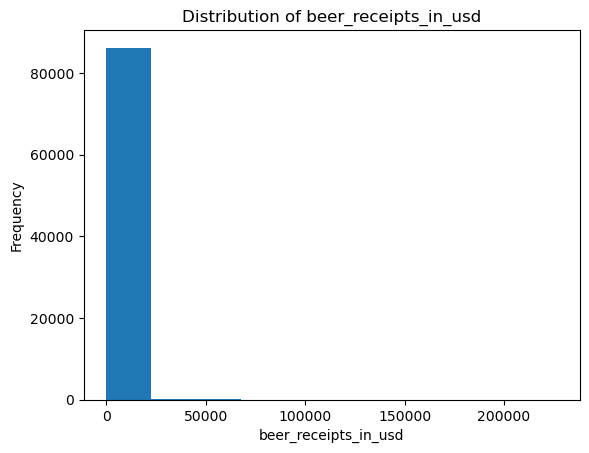

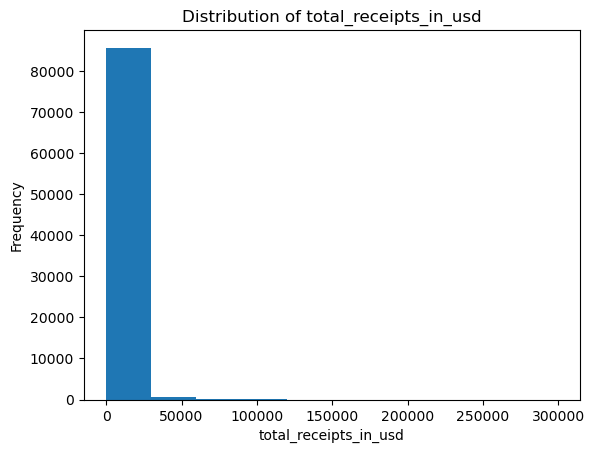

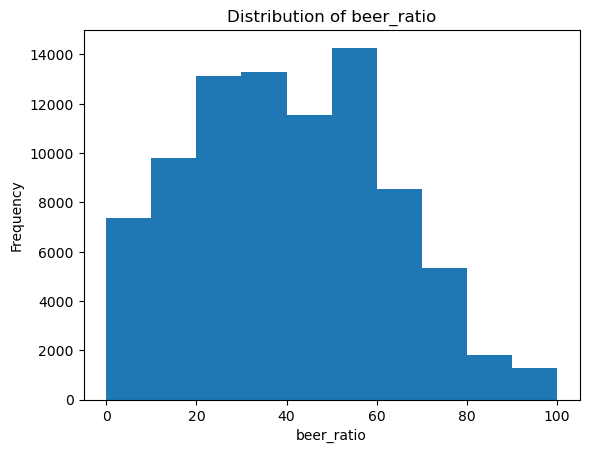

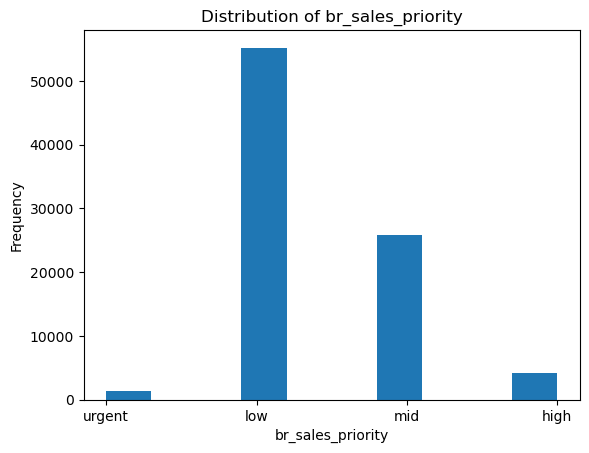

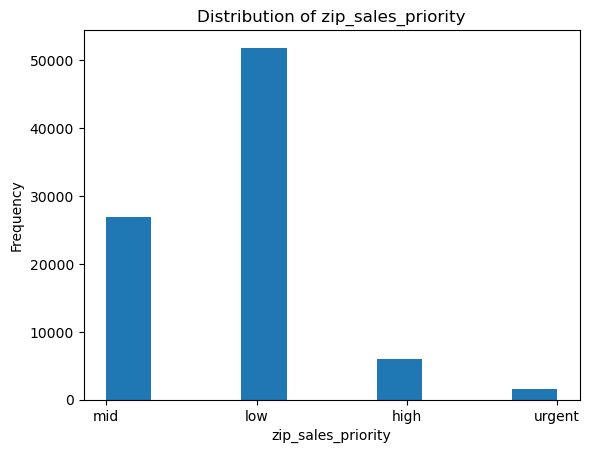

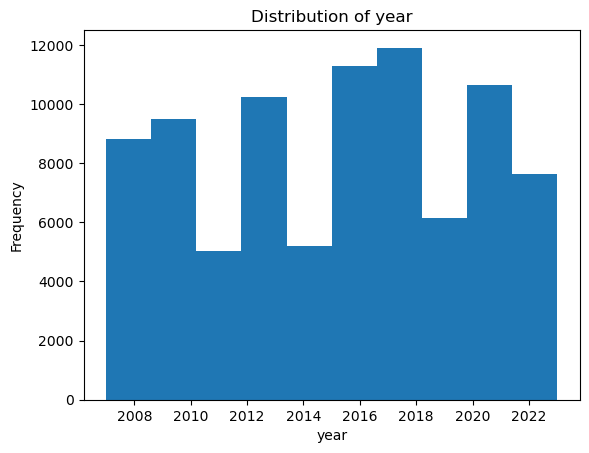

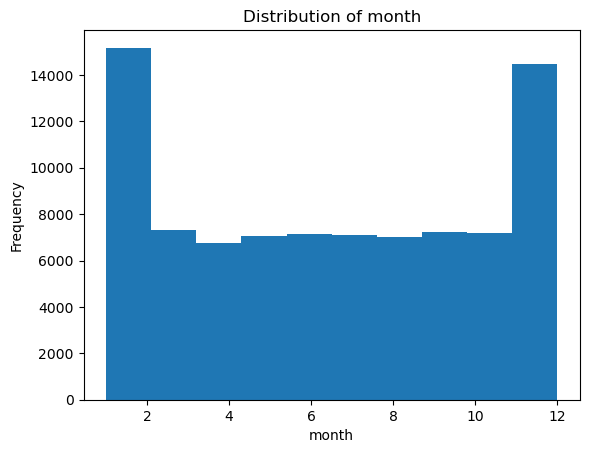

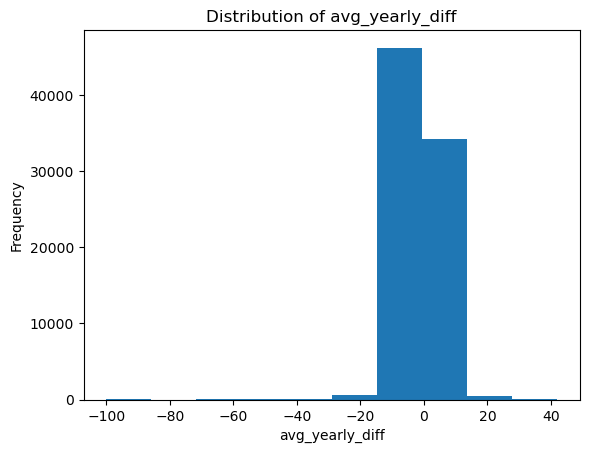

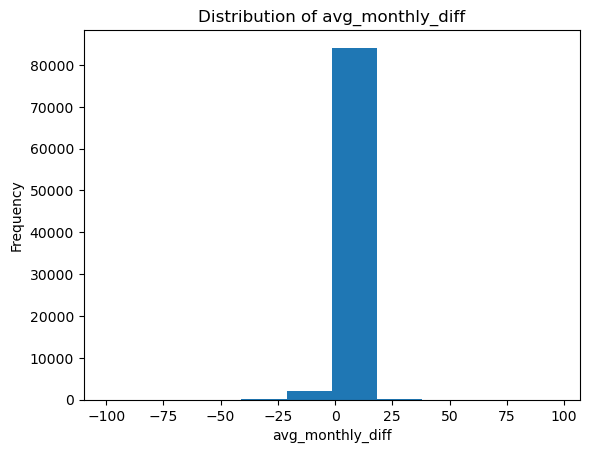

In [22]:
for column in df.columns:
    if not pd.api.types.is_datetime64_any_dtype(df[column]):
        evaluate.show_distribution(df, column)

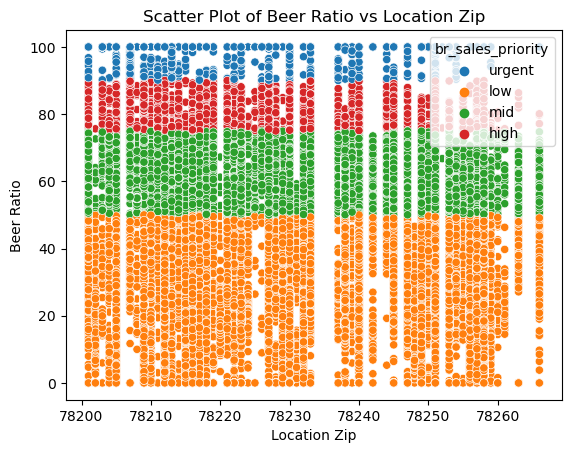

In [23]:
sns.scatterplot(data=df, x='location_zip', y='beer_ratio', hue='br_sales_priority')

plt.xlabel('Location Zip')
plt.ylabel('Beer Ratio')
plt.title('Scatter Plot of Beer Ratio vs Location Zip')

plt.show()

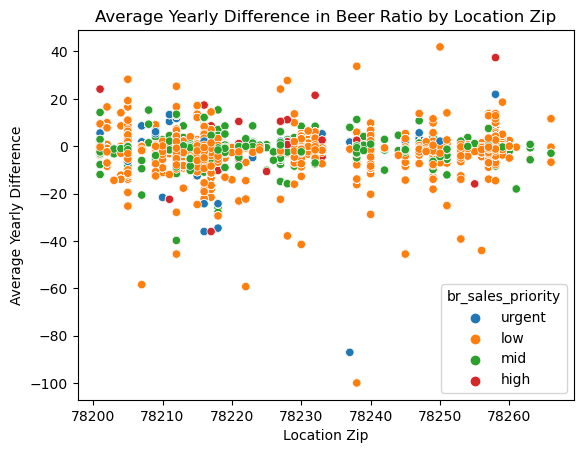

In [24]:
# Visualize the avg_yearly_diff by location_zip
sns.scatterplot(data=df, x='location_zip', y='avg_yearly_diff', hue='br_sales_priority')

plt.xlabel('Location Zip')
plt.ylabel('Average Yearly Difference')
plt.title('Average Yearly Difference in Beer Ratio by Location Zip')

plt.show()

In [18]:
train.set_index('obligation_end_date').sort_index()

location_name  \
obligation_end_date                                                     
2007-01-31                                              SAINT ANTHONY   
2007-01-31                                   WISE GUYS BAR & PIZZERIA   
2007-01-31                                        CHILI'S GRILL & BAR   
2007-01-31                                         BUFFALO WILD WINGS   
2007-01-31                                                 TOM'S CATS   
...                                                               ...   
2023-03-31                                    CAPPY'S AND CAPPYCCINOS   
2023-03-31                                                 RUSTY TACO   
2023-03-31                                                THE SKYLINE   
2023-03-31           HYATT PLACE SAN ANTONIO-NORTHWEST/MEDICAL CENTER   
2023-03-31               R.E.L. BOB WILLIE POST NO. 8397, VETERANS OF   

                    location_zip  liquor_receipts_in_usd  \
obligation_end_date                                        
2007-01-31                 78205                 3441.48   
2007-01-31                 78216                 4658.08   
2007-01-31                 78230                 4158.84   
2007-01-31                 78249                 2792.72   
2007-01-31                 78242                  974.12   
...                          ...                     ...   
2023-03-31                 78209                 3391.94   
2023-03-31                 78247                 1297.32   
2023-03-31                 78202                  289.71   
2023-03-31                 78230                    9.45   
2023-03-31                 78211                  112.83   

                     wine_receipts_in_usd  beer_receipts_in_usd  \
obligation_end_date                                               
2007-01-31                         840.00               1122.24   
2007-01-31                           0.00               3176.74   
2007-01-31                         323.68               2841.30   
2007-01-31                          85.40               9386.86   
2007-01-31                          43.82                189.28   
...                                   ...                   ...   
2023-03-31                        4327.93                419.02   
2023-03-31                          18.29                467.86   
2023-03-31                         231.49                228.27   
2023-03-31                          11.26                 59.43   
2023-03-31                           6.30                202.61   

                     total_receipts_in_usd  beer_ratio br_sales_priority  \
obligation_end_date                                                        
2007-01-31                         5403.72       20.77               low   
2007-01-31                         7834.82       40.55               low   
2007-01-31                         7323.82       38.80               low   
2007-01-31                        12264.98       76.53              high   
2007-01-31                         1207.22       15.68               low   
...                                    ...         ...               ...   
2023-03-31                         8138.89        5.15               low   
2023-03-31                         1783.47       26.23               low   
2023-03-31                          749.46       30.46               low   
2023-03-31                           80.13       74.16               mid   
2023-03-31                          321.73       62.97               mid   

                    zip_sales_priority  
obligation_end_date                     
2007-01-31                         low  
2007-01-31                         low  
2007-01-31                         low  
2007-01-31                         low  
2007-01-31                         mid  
...                                ...  
2023-03-31                         low  
2023-03-31                         low  
2023-03-31                         low  
2023-03-31   

I need to find bars with the highest yoy growth in beer ratio to create a new metric, that I'll predict for next year

In [19]:
df.columns

Index(['location_name', 'location_zip', 'obligation_end_date',
       'liquor_receipts_in_usd', 'wine_receipts_in_usd',
       'beer_receipts_in_usd', 'total_receipts_in_usd', 'beer_ratio',
       'br_sales_priority', 'zip_sales_priority'],
      dtype='object')

In [13]:
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe and splits the data into train, validate and test. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, random_state=seed)
    
    train, validate = train_test_split(train_validate, test_size=0.3, random_state=seed)
    return train, validate, test

In [14]:
train, validate, test = train_validate_test_split(df, 'br_sales_priority')

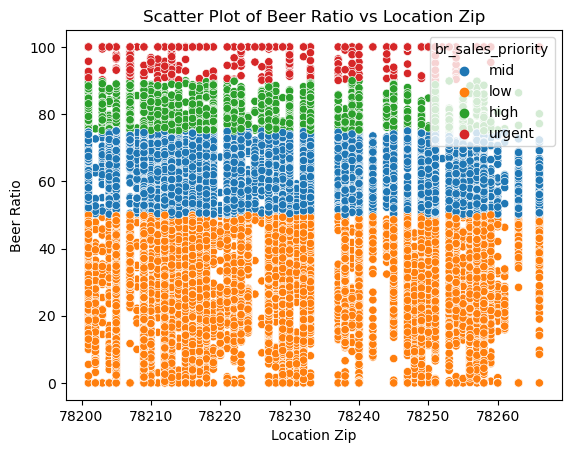

In [16]:
sns.scatterplot(data=train, x='location_zip', y='beer_ratio', hue='br_sales_priority')

plt.xlabel('Location Zip')
plt.ylabel('Beer Ratio')
plt.title('Scatter Plot of Beer Ratio vs Location Zip')

plt.show()